## Imports

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import time 
from numba import njit 
from pyccel.epyccel import epyccel
from pyccel.decorators import types

#fill the imports

## Pure python function

In [50]:
def solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu):
    for n in range(nt):
        un=u
        for i in range(1,nx-1):
            u[i]=un[i] + nu*dt/dx**2 *(un[i+1]-2*un[i]+un[i-1])    
    #fill the update of u
    return 0

## Numba accelerator

In [51]:
@njit(fastmath=True)
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
    for n in range(nt):
        un=u
        for i in range(1,nx-1):
            u[i]=un[i] + nu*dt/dx**2 *(un[i+1]-2*un[i]+un[i-1])    
    #fill the update of u
    return 0

## Pyccel accelerator

In [68]:
@types('float[:]', 'float[:]', 'int', 'int', 'float','float', 'float')
#solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)
def solve_1d_diff_pyccel(u, un, nt, nx, dt, dx, nu):
    for n in range(nt):
        #for i in range(nt): un[i]=u[i]
        for i in range(1,nx):
            #u[i]=un[i] + nu*dt/dx**2 *(un[i+1]-2*un[i]+un[i-1])
            u[i]=u[i] + nu*dt/dx**2 *(u[i+1]-2*u[i]+u[i-1])
            #fill the update of u
    return 0

## Inputs

Text(0.5, 1.0, '1D Diffusion')

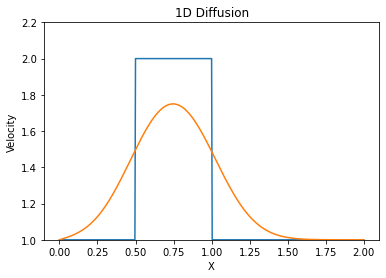

In [69]:
nx = 501
dx = 2 / (nx - 1)
nt = 1500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 

## Call Funtions

### Pure function

In [70]:
%timeit solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)

1.02 s ± 8.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [71]:
%timeit solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu)

4.11 ms ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Function with pyccel accelerator

In [72]:
solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)

In [73]:
%timeit solve_1d_diff_f90(u, un, nt, nx, dt, dx, nu)

2.92 ms ± 2.57 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
